# Notebook: 1
<hr>




![Alt text](3-tricks-that-car-salesmen-use-to-take-your-money_twitter_card_800x320_v20230104094542.jpg)

<hr> 

### Nathan Collins

##### **ID:** 12062131

<hr>
<br>

# Data Preprocessing and Exploration

> # Description

The business objective stems from a binary classification problem. 

I am tasked to construct a model that can predict if whether an existing customer is more likely to buy a new car. 

The results of the model can be applied for targeting leads for a marketing campaign.

<br>
<br>

 # Importing the Libraries into a Dataframe

In [24]:
# Import relevant libraries for data analysis and visualisation.

# General libraries
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import altair as alt

# Statistical learning models, preprocessing and metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Other
from scipy.stats import pearsonr
from scipy.stats import mode

# Dismissing Warnings
import warnings
warnings.filterwarnings('ignore')


In [25]:
# Import the dataset and store it in a dataframe called 'cars_df'.

cars_df = pd.read_csv('https://raw.githubusercontent.com/modernth3ory/repurchase_train.csv/main/repurchase_training.csv')

<br>
<br>
<br>
<br>
<br>
<br>
<br>

 # Exploring the Dataset

In [26]:
# Display the first 5 rows of the dataframe.

cars_df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [27]:
# Display the last 5 rows of the dataframe.

cars_df.tail()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
131332,154134,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10
131336,154139,1,NaN,NaN,model_1,LCV,6,1,7,1,10,10,5,3,4,9,10


In [28]:
# Display the shape of the dataframe.

cars_df.shape

(131337, 17)

In [29]:
# Display the summary statistics of the dataframe.

cars_df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [30]:
# Display the information about the dataframe.

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

> ##### Insights

- The dataset contains [ **17** ] columns.

- Dataset contains both categorical and numerical variables, with NaN values in [ **2** ] columns, [ **age_band** and **gender** ].

- The columns containing object variables are: [ **age_band, gender, car_model, car_segment** ]. 

- All remaining features are [ **int64** ] variables.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


 # Data Cleaning


### Determine if there are any duplicate rows in the dataset and remove them.

In [31]:
# Drop the ID column from the dataframe.

cars_df.drop('ID', axis=1, inplace=True)

# Determine whether the data contains any duplicate entries.

duplicates = cars_df.duplicated().sum()
print("Number of duplicated entries:", duplicates)

Number of duplicated entries: 2726


[ 2726 ] duplicate entries detected. 

Removal of these entries is paramount, as it may create bias in the model and result in inaccuracy. 

Removal does not account for any information loss.

<br>
<br>


In [32]:
# Drop duplicate entries.
cars_df.drop_duplicates(inplace=True)

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Determine which columns contain NaN values and amend them.

In [33]:
# Display the missing values in the dataset.

cars_df.isnull().sum()

# Create a null table with number of nans and percentage of nans.

null_table = pd.DataFrame(cars_df.isnull().sum().sort_values(ascending=False))
null_table.columns = ['Number of NaNs']
null_table['Percentage of NaNs'] = null_table['Number of NaNs'] / len(cars_df) * 100
null_table


,Number of NaNs,Percentage of NaNs
age_band,109668,85.271089
gender,67455,52.448857
Target,0,0.000000
car_model,0,0.000000
car_segment,0,0.000000
age_of_vehicle_years,0,0.000000
sched_serv_warr,0,0.000000
non_sched_serv_warr,0,0.000000
sched_serv_paid,0,0.000000
non_sched_serv_paid,0,0.000000


<AxesSubplot:>

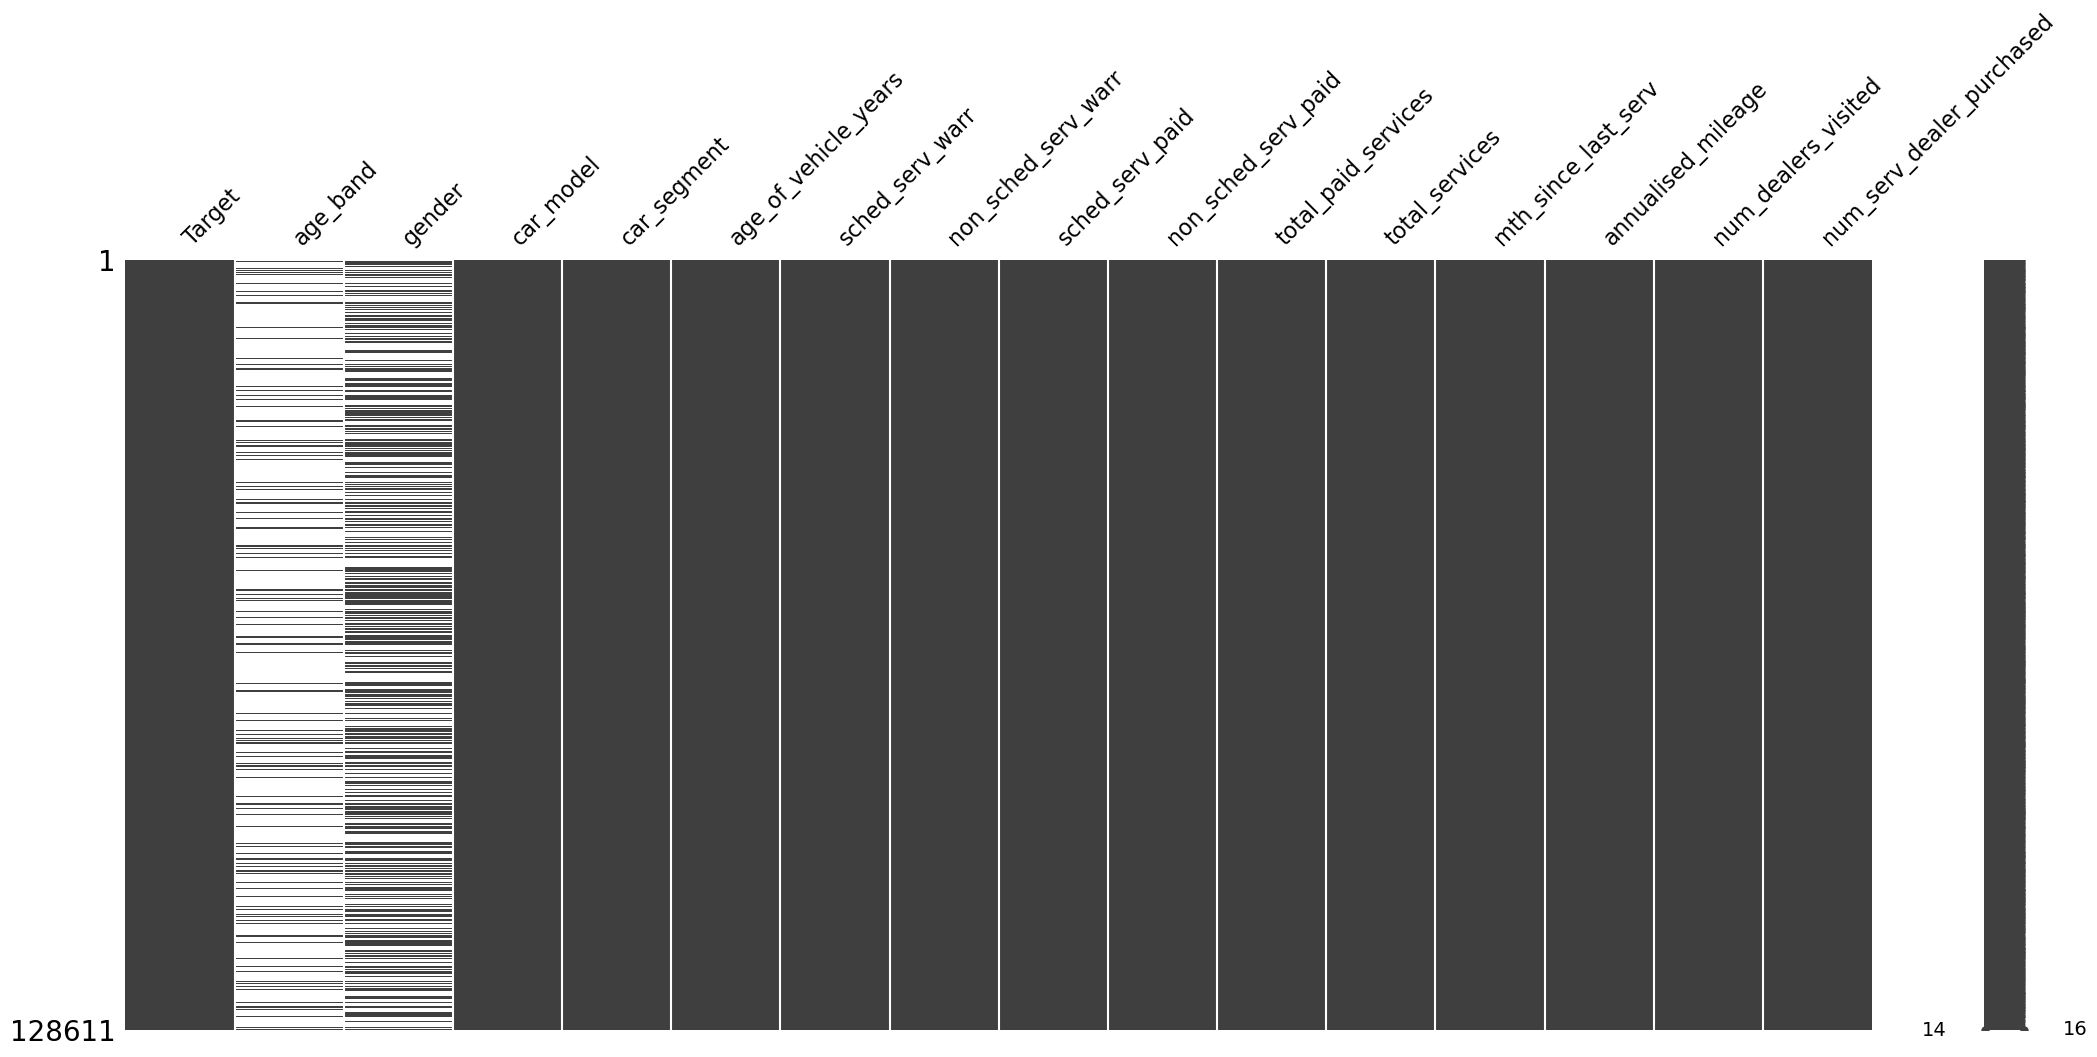

In [34]:
# Visualise missing values in the dataframe using missingno library.

msno.matrix(cars_df)

Since age_band and gender may provide important insights during modelling, retaining these features will be prioritised in a separate dataframe.

<br>
<br>

In [35]:
# Display the age_band column.

cars_df['age_band'].value_counts()

4. 45 to 54    4051
3. 35 to 44    3830
2. 25 to 34    3546
5. 55 to 64    3392
6. 65 to 74    2138
7. 75+         1019
1. <25          967
Name: age_band, dtype: int64

In [36]:
# Display the gender column.

cars_df['gender'].value_counts()

Male      35440
Female    25716
Name: gender, dtype: int64

<br>
<br>
<br>

## Creating the two cleaned dataframes: 

- `[ cars_df ] with all columns`

- `[ cars_df ] with no age and gender columns`

<br>

In [37]:
# Make a copy of original dataset for cleaning.

cars_df_clean = cars_df.copy()

### Convert all categorical (nominal) features into numerical (ordinal) features.

In [38]:
# Display the information about the current dataframe.

cars_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128611 entries, 0 to 131336
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Target                     128611 non-null  int64 
 1   age_band                   18943 non-null   object
 2   gender                     61156 non-null   object
 3   car_model                  128611 non-null  object
 4   car_segment                128611 non-null  object
 5   age_of_vehicle_years       128611 non-null  int64 
 6   sched_serv_warr            128611 non-null  int64 
 7   non_sched_serv_warr        128611 non-null  int64 
 8   sched_serv_paid            128611 non-null  int64 
 9   non_sched_serv_paid        128611 non-null  int64 
 10  total_paid_services        128611 non-null  int64 
 11  total_services             128611 non-null  int64 
 12  mth_since_last_serv        128611 non-null  int64 
 13  annualised_mileage         128611 non-null  

In [39]:
# Create a new dataframe called 'cars_NAG' by dropping the 'age_band' and 'gender' columns.

cars_NAG = cars_df_clean.drop(['age_band', 'gender'], axis=1)

# Display the shape of the new dataframe.

cars_NAG.shape


(128611, 14)

#### Create a new dataframe without NaN values, while retaining the age and gender columns.

In [40]:
# Create a new dataframe called 'cars_ALL' which contains all rows with no missing values.

cars_ALL = cars_df_clean.dropna()

# Display the shape of the new dataframe.

cars_ALL.shape


(18289, 16)

#### Convert the "age_band" column in the "cars_NAG" dataset into numerical variables.

<AxesSubplot:xlabel='age_band', ylabel='count'>

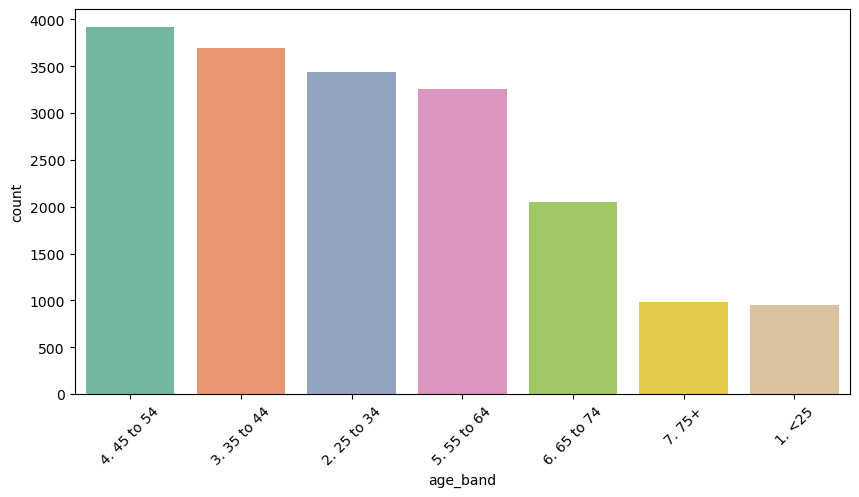

In [41]:
# Visualise the distribution of the 1. <25, 2. 25-34, 3. 35-44, 4. 45-54, 5. 55-64, 6. 65-74, 7. 75+ age bands. Rotate the x-axis labels by 45 degrees. Order the age bands from lowest to highest.

plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
sns.countplot(x=cars_ALL['age_band'], order=cars_ALL['age_band'].value_counts().index, palette='Set2')

In [42]:
# Display the age band column.

cars_ALL['age_band'].value_counts()

# Convert the age_band column to numerical values using one hot encoding.

cars_ALL = pd.concat([cars_ALL, pd.get_dummies(cars_ALL['age_band'])], axis=1)

# Delete the age_band column.

del cars_ALL['age_band']

# Display the first 5 rows of the new dataframe.

cars_ALL.head()

,Target,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,...,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,1. <25,2. 25 to 34,3. 35 to 44,4. 45 to 54,5. 55 to 64,6. 65 to 74,7. 75+
0,0,Male,model_1,LCV,9,2,10,3,7,5,...,8,10,4,0,0,1,0,0,0,0
6,0,Male,model_3,Large/SUV,8,2,8,2,9,9,...,6,10,4,1,0,0,0,0,0,0
34,0,Female,model_2,Small/Medium,5,10,6,9,7,8,...,9,3,10,0,1,0,0,0,0,0
38,0,Female,model_2,Small/Medium,7,8,2,8,2,5,...,9,7,7,0,0,0,1,0,0,0
51,0,Female,model_7,LCV,6,4,4,4,6,5,...,10,7,1,0,1,0,0,0,0,0


#### Convert the "gender" column in the "cars_ALL" dataset into numerical variables.

In [43]:
# Display the gender column.

cars_ALL['gender'].value_counts()

# Convert the gender column to numerical values using one hot encoding.

cars_ALL = pd.concat([cars_ALL, pd.get_dummies(cars_ALL['gender'])], axis=1)

# Delete the gender column.

del cars_ALL['gender']

# Display the first 5 rows of the new dataframe.

cars_ALL.head()


,Target,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,...,num_serv_dealer_purchased,1. <25,2. 25 to 34,3. 35 to 44,4. 45 to 54,5. 55 to 64,6. 65 to 74,7. 75+,Female,Male
0,0,model_1,LCV,9,2,10,3,7,5,6,...,4,0,0,1,0,0,0,0,0,1
6,0,model_3,Large/SUV,8,2,8,2,9,9,4,...,4,1,0,0,0,0,0,0,0,1
34,0,model_2,Small/Medium,5,10,6,9,7,8,9,...,10,0,1,0,0,0,0,0,1,0
38,0,model_2,Small/Medium,7,8,2,8,2,5,6,...,7,0,0,0,1,0,0,0,1,0
51,0,model_7,LCV,6,4,4,4,6,5,4,...,1,0,1,0,0,0,0,0,1,0


#### Convert the "car_model" column in both dataframes, into numerical variables.

In [44]:
# Remove the "model_" string in the car_model column, of both dataframes.

cars_ALL['car_model'] = cars_ALL['car_model'].str.replace('model_', '')
cars_NAG['car_model'] = cars_NAG['car_model'].str.replace('model_', '')

# Convert the car_model column to numerical values.

cars_ALL['car_model'] = pd.to_numeric(cars_ALL['car_model'])
cars_NAG['car_model'] = pd.to_numeric(cars_NAG['car_model'])

#### Convert the "car_segment" column in both dataframes, into numerical variables.

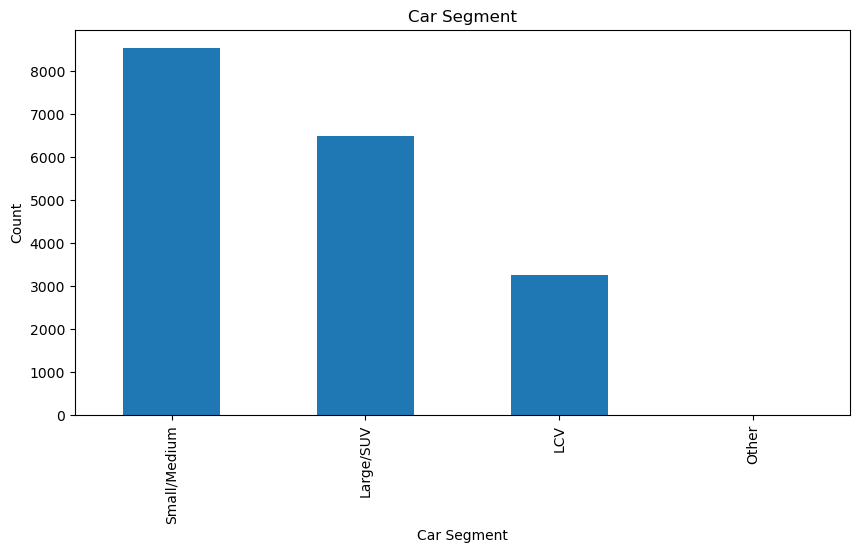

In [45]:
# Display the car_segment column as a bar chart.

cars_ALL['car_segment'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Car Segment'), 
plt.xlabel('Car Segment'), 
plt.ylabel('Count'), 
plt.show()


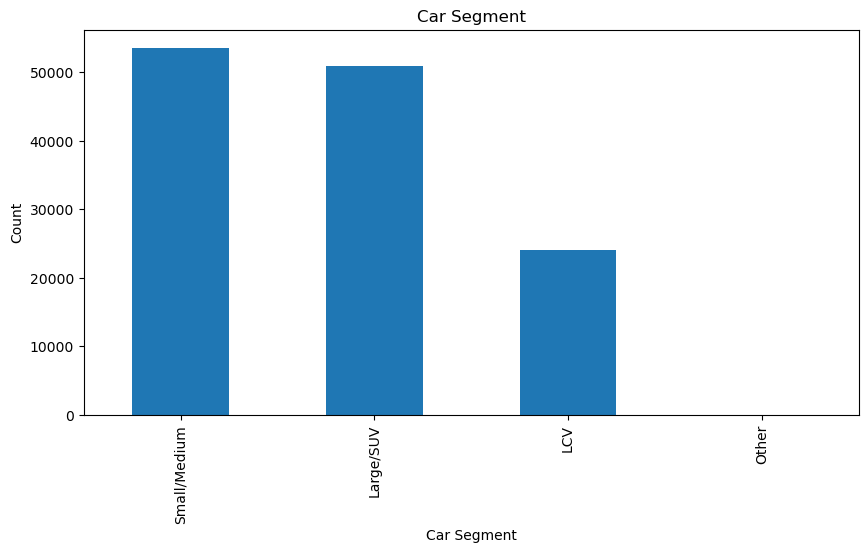

In [46]:
# Display the car_segment column as a bar chart.

cars_NAG['car_segment'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Car Segment'), 
plt.xlabel('Car Segment'), 
plt.ylabel('Count'), 
plt.show()

In [47]:
# Count the number of other cars in the car_segment column.

cars_ALL['car_segment'].value_counts()['Other']

2

In [48]:
# Convert the car_segment column in both dataframes to numerical values using one hot encoding.

cars_ALL = pd.concat([cars_ALL, pd.get_dummies(cars_ALL['car_segment'])], axis=1)
cars_NAG = pd.concat([cars_NAG, pd.get_dummies(cars_NAG['car_segment'])], axis=1)

# Delete the car_segment column in both dataframes.

del cars_ALL['car_segment']
del cars_NAG['car_segment']

In [49]:
# Display the range of features in both dataframes.

cars_ALL.describe().loc[["min", "max"],:]

,Target,car_model,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,...,4. 45 to 54,5. 55 to 64,6. 65 to 74,7. 75+,Female,Male,LCV,Large/SUV,Other,Small/Medium
min,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,18.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [50]:
# Sort all possible values for every numerical feature in the dataset.

for column in cars_ALL.select_dtypes(include=['int64']).columns:
    print(sorted(cars_ALL[column].unique()))

[0, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [51]:
# Display the range of features in both dataframes.

cars_NAG.describe().loc[["min", "max"],:]

,Target,car_model,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,LCV,Large/SUV,Other,Small/Medium
min,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
max,1.0,19.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.0,1.0,1.0


In [52]:
# Sort all possible values for every numerical feature in the dataset.

for column in cars_NAG.select_dtypes(include=['int64']).columns:
    print(sorted(cars_NAG[column].unique()))

[0, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


> ##### Insights

There are now two dataframes to work with:

- `cars_ALL` retains all features, minus the rows with `NaN values`. 

- Age and gender were deemed important features, and thus were not removed. The only caveat, is there are significantly less rows in this dataframe.

- `cars_NAG` removes columns `age_band` and `gender`. 

- This provides more rows to work with, but at the cost of losing some important features.

<br>

This approach was selected, as it is believed age and gender may play an influential role in the decision to buy a new car.

The dataset is now considered clean.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


 # Exploratory Data Analysis


### Visualising correlations between features and the target variable.

<AxesSubplot:>

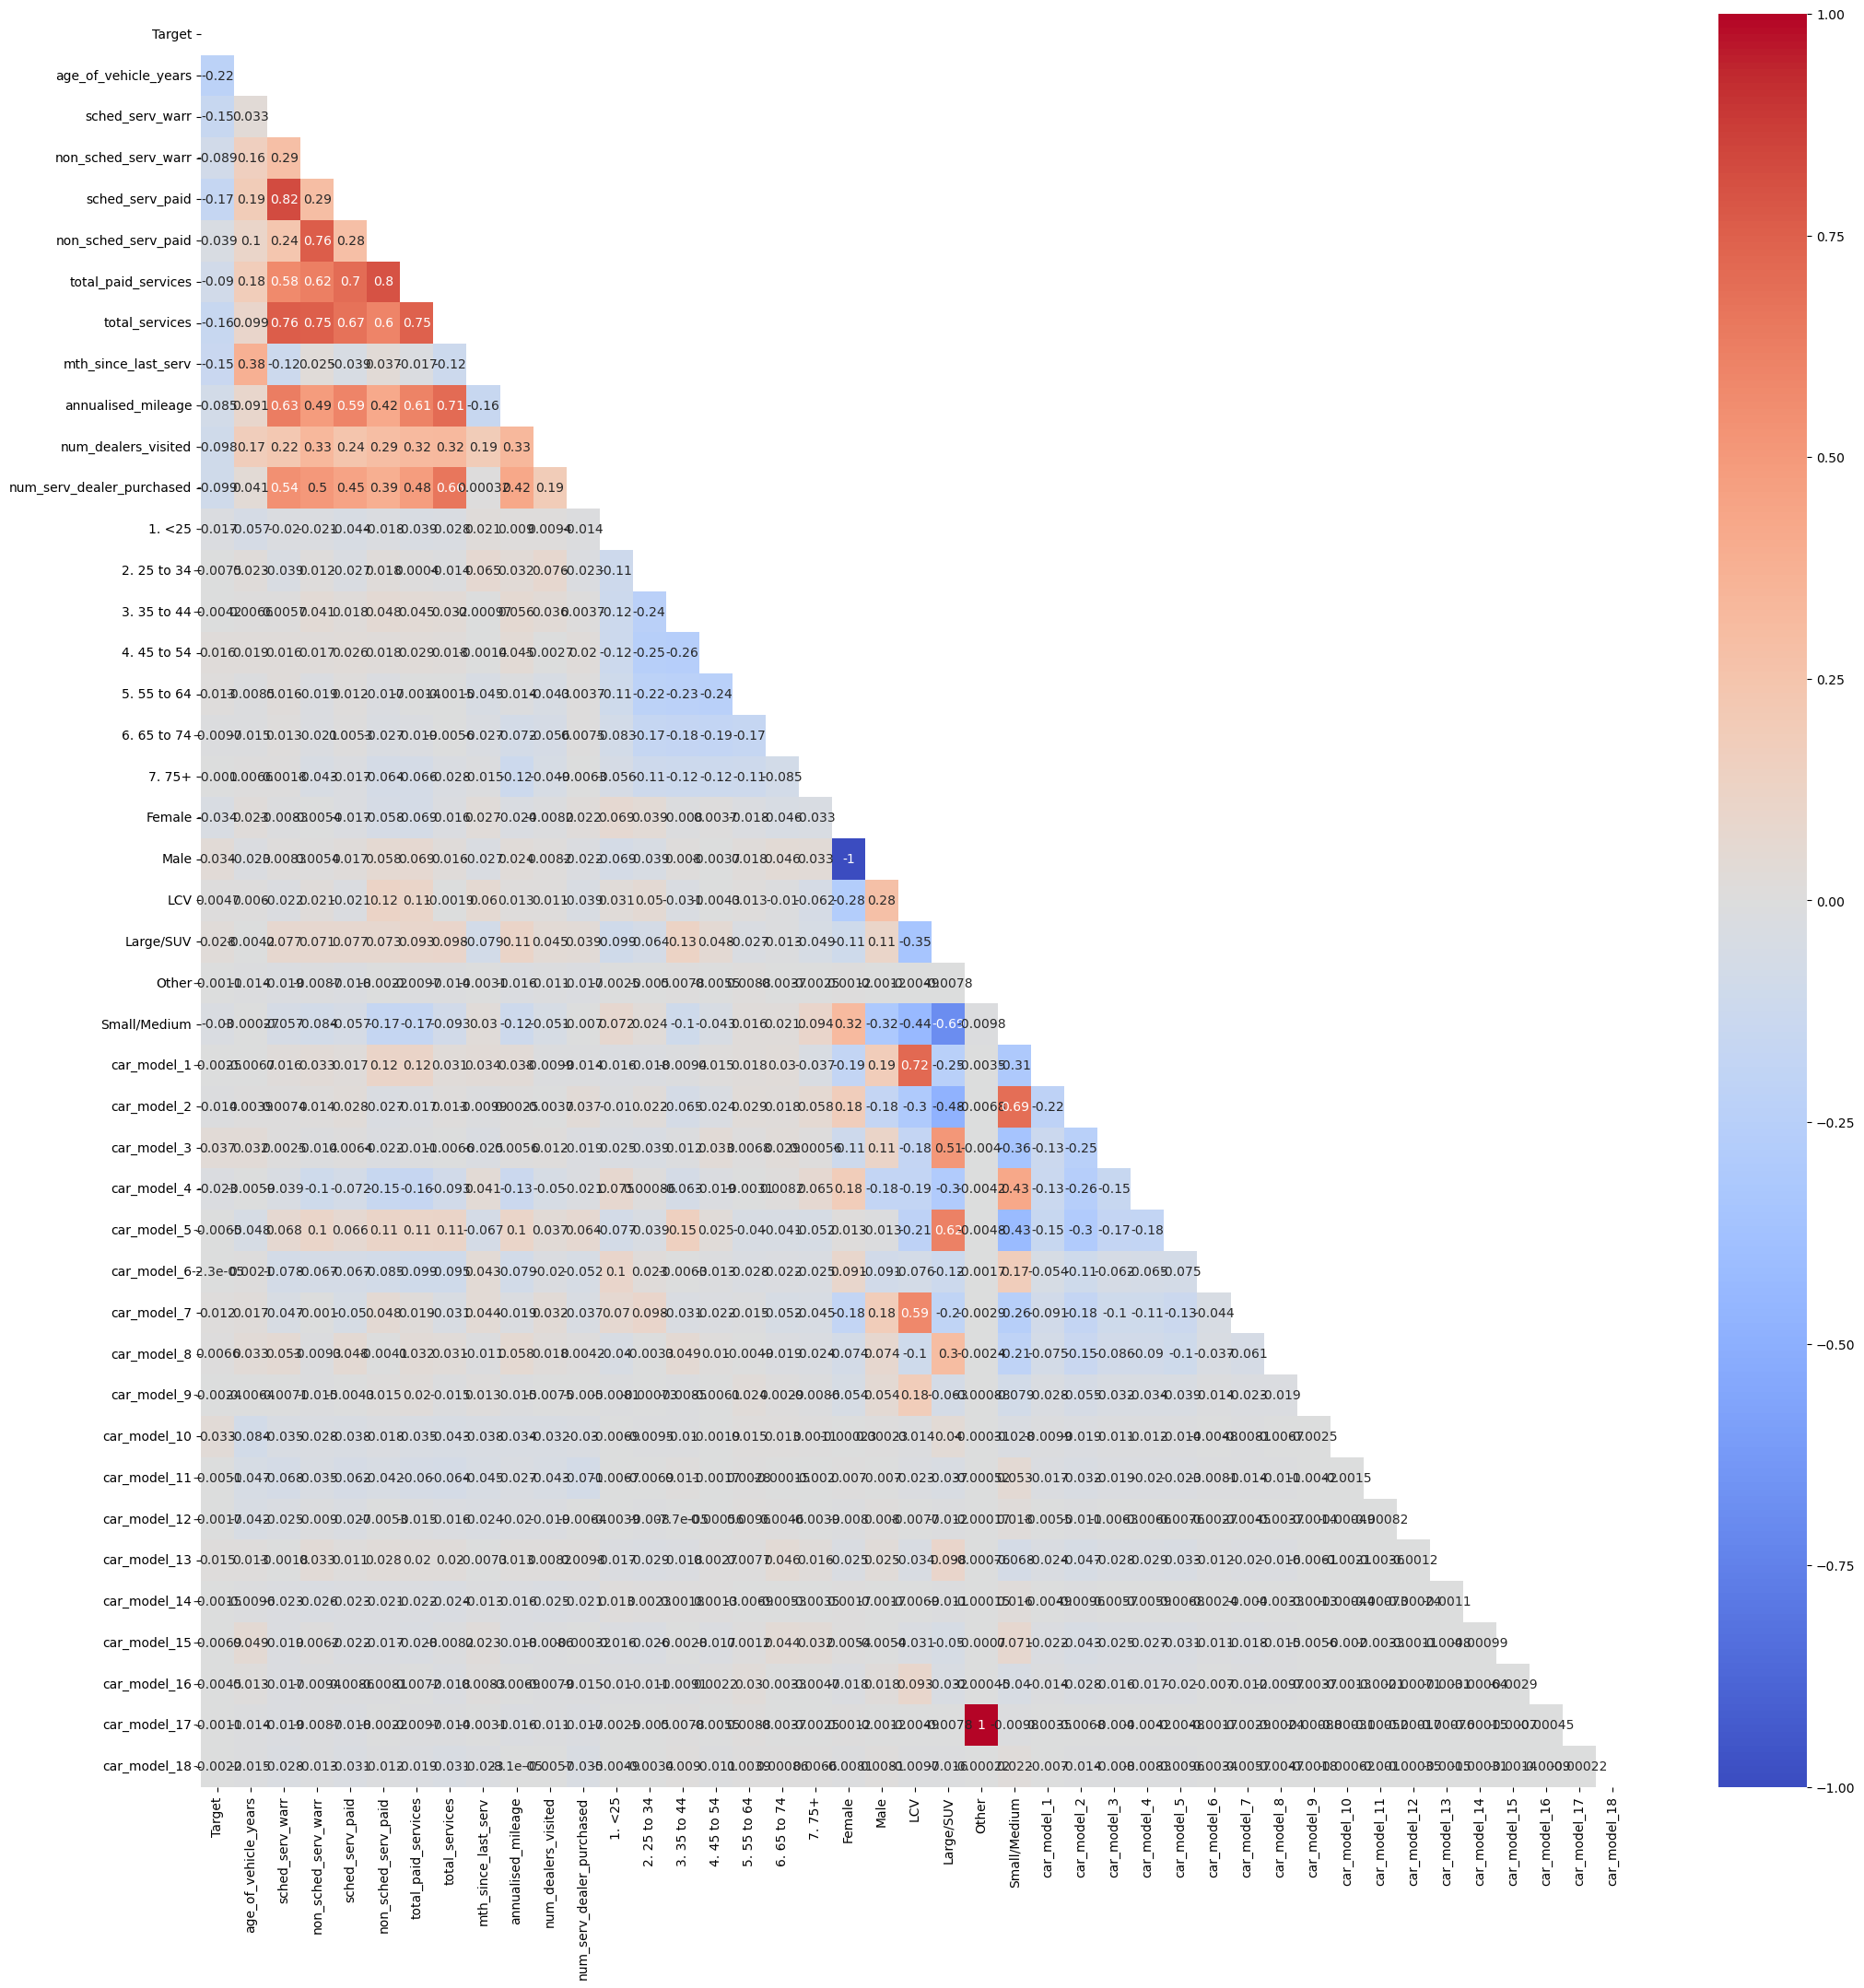

In [81]:
# Visualise correlation between the features using a heatmap.
corr= cars_ALL.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=matrix)

In [54]:
# Display the highest correlated features of both dataframe, with the Target.

# Calculate the correlation between Target and all features in cars_ALL
corr_ALL = cars_ALL.corr()['Target'].sort_values(ascending=False)

# Create a DataFrame with the 10 most correlated features in cars_ALL
df_ALL = pd.DataFrame({'cars_ALL': corr_ALL.index[:11], 'correlation_ALL': corr_ALL.values[:11]})

# Calculate the correlation between Target and all features in cars_NAG
corr_NAG = cars_NAG.corr()['Target'].sort_values(ascending=False)

# Create a DataFrame with the 10 most correlated features in cars_NAG
df_NAG = pd.DataFrame({'cars_NAG': corr_NAG.index[:11], 'correlation_NAG': corr_NAG.values[:11]})

# Concatenate the two DataFrames to create a new DataFrame with 4 columns
df_corr = pd.concat([df_ALL, df_NAG], axis=1)

# Print the resulting DataFrame
print(df_corr)

       cars_ALL  correlation_ALL                   cars_NAG  correlation_NAG
0        Target         1.000000                     Target         1.000000
1          Male         0.033980                  Large/SUV         0.015211
2     Large/SUV         0.027986                        LCV         0.010342
3   4. 45 to 54         0.016244                  car_model         0.000575
4   5. 55 to 64         0.013153                      Other        -0.001319
5     car_model         0.008100               Small/Medium        -0.023228
6           LCV         0.004723        non_sched_serv_paid        -0.033297
7        7. 75+        -0.001011        num_dealers_visited        -0.053589
8         Other        -0.001083  num_serv_dealer_purchased        -0.058963
9   3. 35 to 44        -0.004205         annualised_mileage        -0.080251
10  2. 25 to 34        -0.007470        non_sched_serv_warr        -0.088442


> ##### Insights

- Correlations in both dataframes between features and the target variable are very weak.

- While `cars_ALL` contains `~110,000` less rows than `cars_NAG`, key features removed in `cars_NAG` do appear to have stronger correlations with the target variable. For example, Males and age brackets 45 to 54 and 55 to 64 are more likely to buy a new car.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Investigating the cohort of customers who have bought a new car.

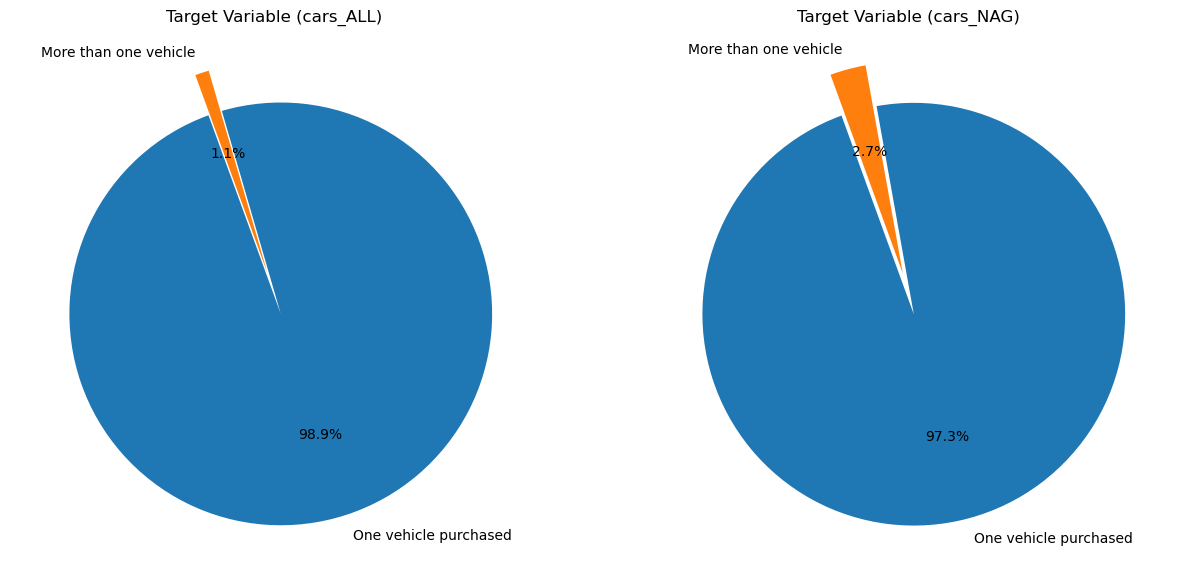

In [55]:
# Visualise the target variable in both cars_ALL and cars_NAG using a pie chart.

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
cars_ALL['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=110, explode=(0.1, 0.1), labels=['One vehicle purchased', 'More than one vehicle'], ax=ax[0]), ax[0].set_title('Target Variable (cars_ALL)'), ax[0].set_ylabel('')
cars_NAG['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=110, explode=(0.1, 0.1), labels=['One vehicle purchased', 'More than one vehicle'], ax=ax[1]), ax[1].set_title('Target Variable (cars_NAG)'), ax[1].set_ylabel('')
plt.show()

In [56]:
# Count the number of rows where the target variable is equal to 1.

Cohort1 = cars_ALL['Target'].value_counts()[1]
Cohort2 = cars_NAG['Target'].value_counts()[1]

# Calculate the percentage of the target variable in both dataframes.

print('Target audience of cars_ALL:', Cohort1)
print('Percentage of Target in cars_ALL:', Cohort1 / len(cars_ALL) * 100, '%', '\n')
print('Target audience of cars_NAG:', Cohort2)
print('Percentage of Target in cars_NAG:', Cohort2 / len(cars_NAG) * 100, '%')

Target audience of cars_ALL: 194
Percentage of Target in cars_ALL: 1.0607468970419376 % 

Target audience of cars_NAG: 3521
Percentage of Target in cars_NAG: 2.7377129483481197 %


> ##### Insights

- The cohort of interest only represents a low percentage of the total dataset.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Investigating the interests of the cohort.

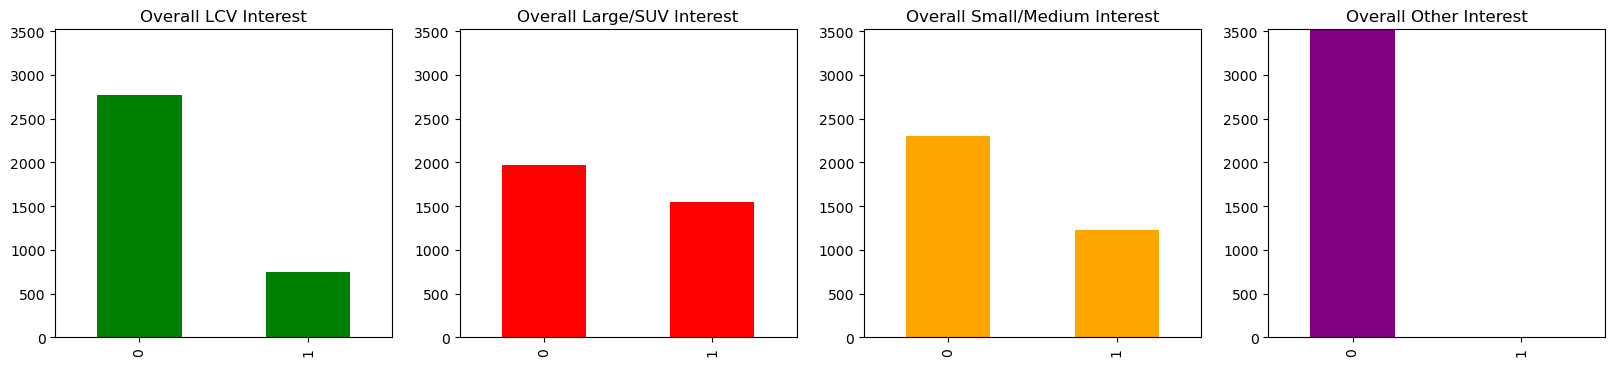

In [57]:
# For cars_NAG rows with a Target value of 1, visualise the car_model and 'LCV', 'Large/SUV', 'Small/Medium', 'Other' columns in separate bar charts.
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

max_y = max(cars_NAG[cars_NAG['Target'] == 1]['LCV'].value_counts().max(),
            cars_NAG[cars_NAG['Target'] == 1]['Large/SUV'].value_counts().max(),
            cars_NAG[cars_NAG['Target'] == 1]['Small/Medium'].value_counts().max(),
            cars_NAG[cars_NAG['Target'] == 1]['Other'].value_counts().max())

for j in range(4):
    ax[j].set_ylim([0, max_y])

cars_NAG[cars_NAG['Target'] == 1]['LCV'].value_counts().plot(kind='bar', ax=ax[0], title='Overall LCV Interest', color='green')
cars_NAG[cars_NAG['Target'] == 1]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[1], title='Overall Large/SUV Interest', color='red')
cars_NAG[cars_NAG['Target'] == 1]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[2], title='Overall Small/Medium Interest', color='orange')
cars_NAG[cars_NAG['Target'] == 1]['Other'].value_counts().plot(kind='bar', ax=ax[3], title='Overall Other Interest', color='purple')

plt.show()

<AxesSubplot:title={'center':'Female Other Interest'}>

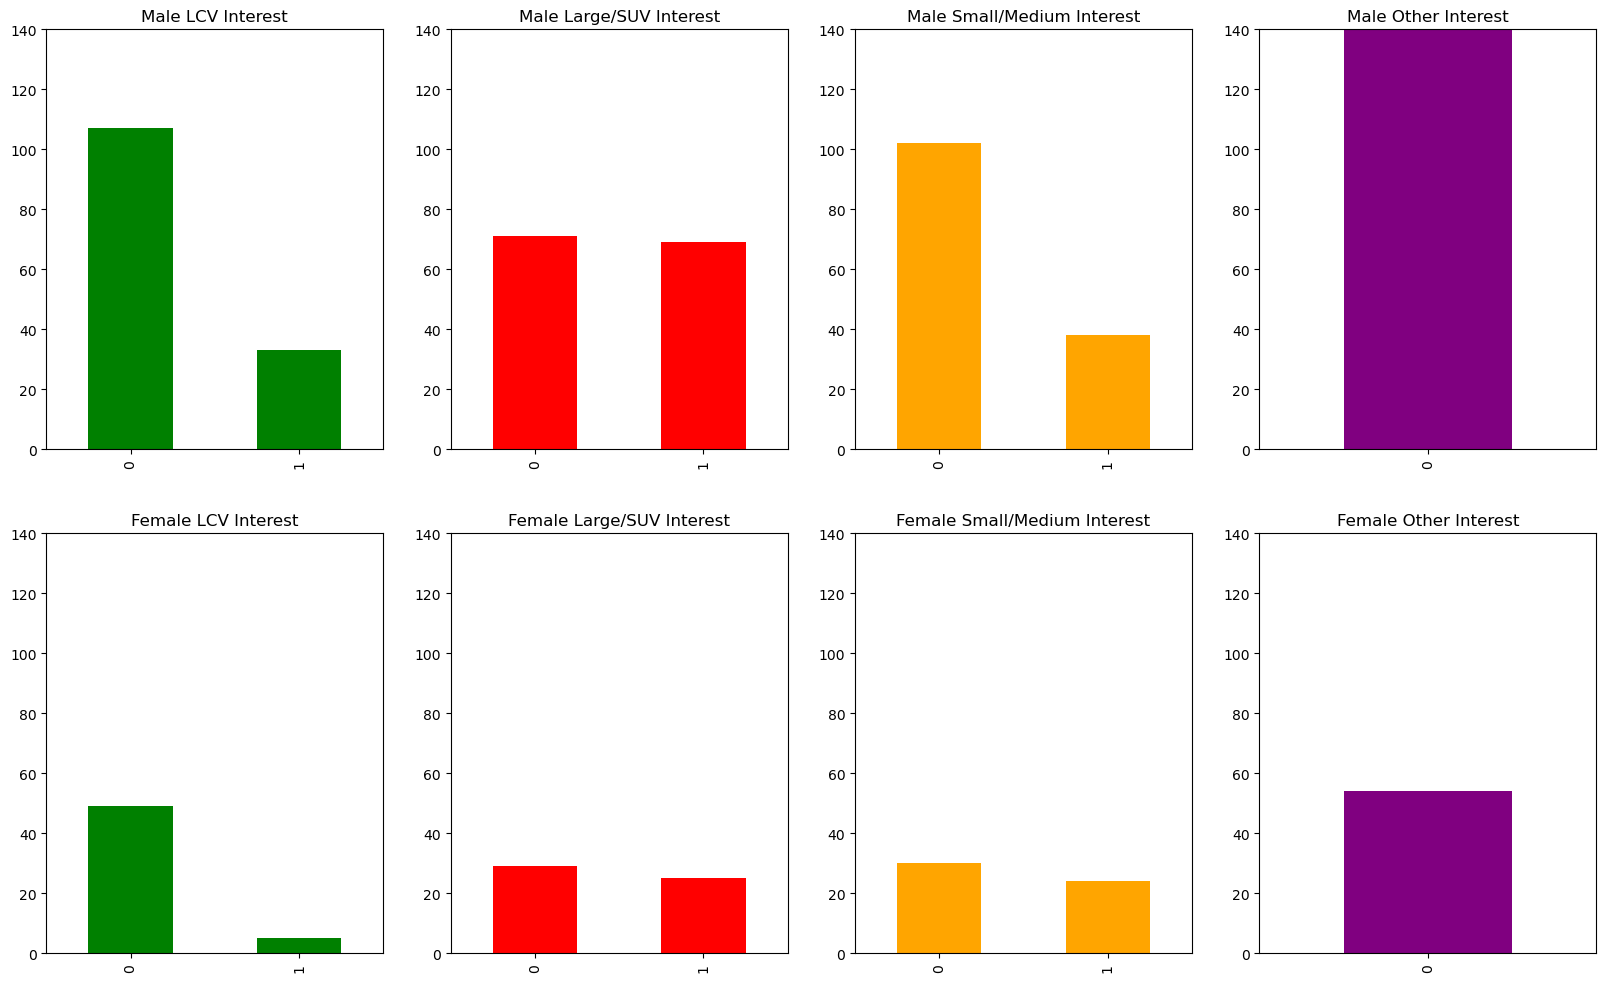

In [58]:
# For cars_ALL rows with a Target value of 1, visualise the car_model and 'LCV', 'Large/SUV', 'Small/Medium', 'Other' columns between genders, in separate bar charts.
fig, ax = plt.subplots(2, 4, figsize=(20, 12))

max_y = max(cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['LCV'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Large/SUV'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Small/Medium'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Other'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['LCV'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Large/SUV'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Small/Medium'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Other'].value_counts().max())

for i in range(2):
    for j in range(4):
        ax[i][j].set_ylim([0, max_y])

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[0][0], title='Male LCV Interest', color='green')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[0][1], title='Male Large/SUV Interest', color='red')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[0][2], title='Male Small/Medium Interest', color='orange')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[0][3], title='Male Other Interest', color='purple')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[1][0], title='Female LCV Interest', color='green')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[1][1], title='Female Large/SUV Interest', color='red')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[1][2], title='Female Small/Medium Interest', color='orange')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[1][3], title='Female Other Interest', color='purple')


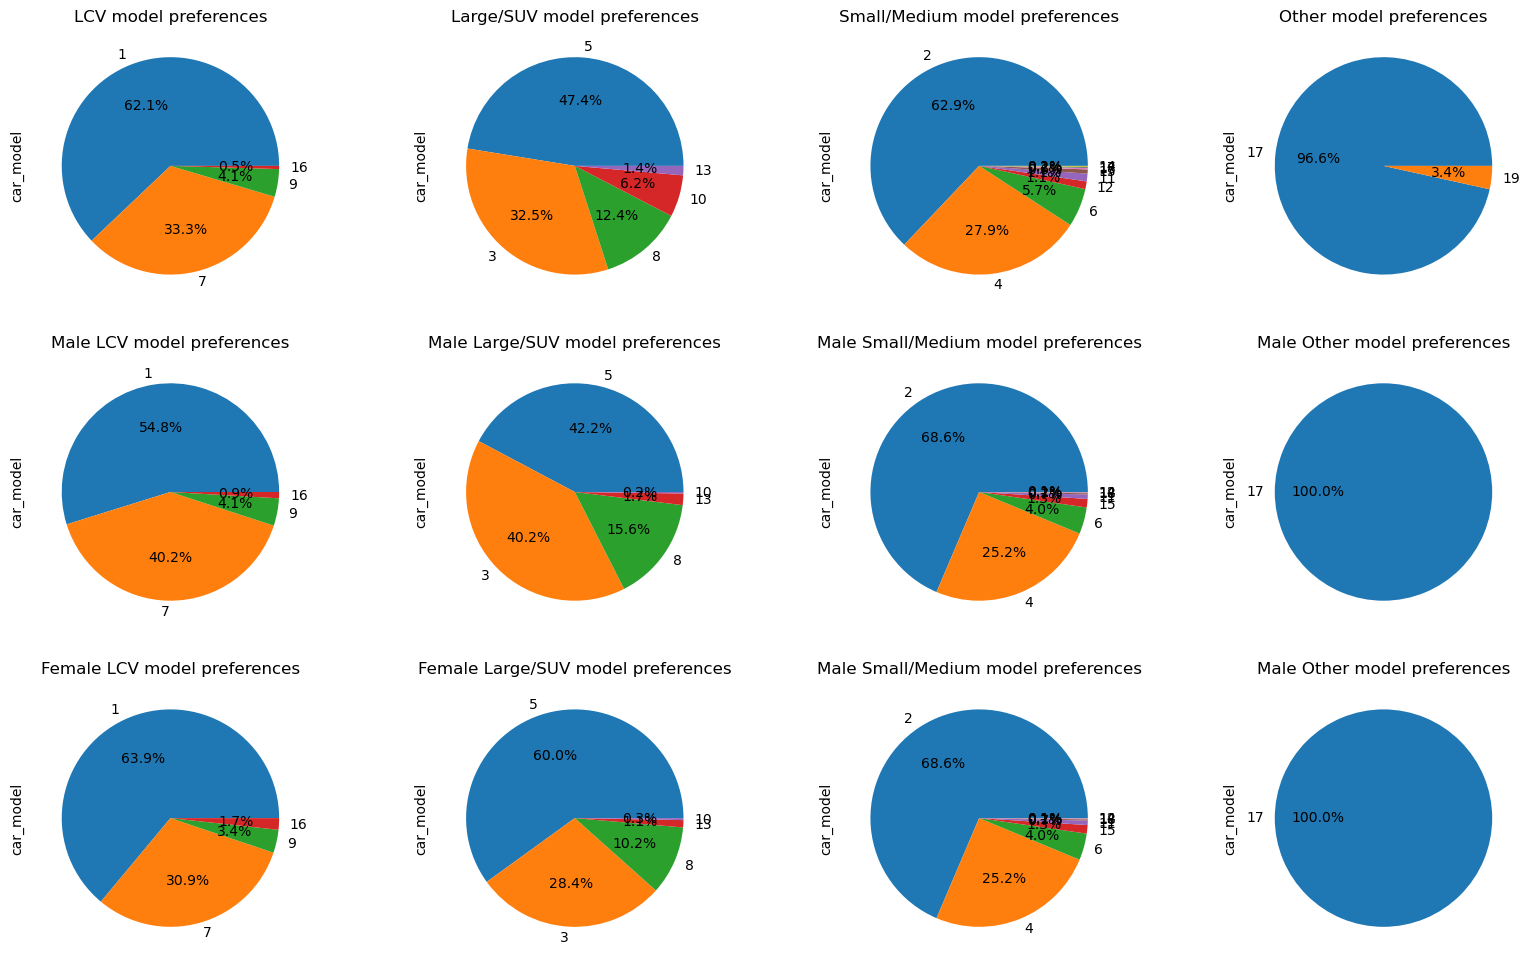

In [59]:
# Visualise rows with LCV = 1, display the frequency of each car_model in a bar chart.
fig, ax = plt.subplots(3, 4, figsize=(20, 12))

cars_NAG[cars_NAG['LCV'] == 1]['car_model'].value_counts().plot(kind='pie', title='LCV model preferences', ax=ax[0][0], autopct='%1.1f%%')
cars_NAG[cars_NAG['Large/SUV'] == 1]['car_model'].value_counts().plot(kind='pie', title='Large/SUV model preferences', ax=ax[0][1], autopct='%1.1f%%')
cars_NAG[cars_NAG['Small/Medium'] == 1]['car_model'].value_counts().plot(kind='pie', title='Small/Medium model preferences', ax=ax[0][2], autopct='%1.1f%%')
cars_NAG[cars_NAG['Other'] == 1]['car_model'].value_counts().plot(kind='pie', title='Other model preferences', ax=ax[0][3], autopct='%1.1f%%')

cars_ALL[(cars_ALL['LCV'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male LCV model preferences', ax=ax[1][0], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Large/SUV'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male Large/SUV model preferences', ax=ax[1][1], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Small/Medium'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male Small/Medium model preferences', ax=ax[1][2], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Other'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male Other model preferences', ax=ax[1][3], autopct='%1.1f%%')

cars_ALL[(cars_ALL['LCV'] == 1) & (cars_ALL['Female'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Female LCV model preferences', ax=ax[2][0], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Large/SUV'] == 1) & (cars_ALL['Female'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Female Large/SUV model preferences', ax=ax[2][1], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Small/Medium'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male Small/Medium model preferences', ax=ax[2][2], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Other'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male Other model preferences', ax=ax[2][3], autopct='%1.1f%%')

plt.show()

> ##### Insights

- When not factoring age or gender, the cohort of interest preferences [ Large/SUV ] cars, with [ Small/Medium ] close behind.

- When factoring in gender, males preference [ Large/SUV ] vehicles, while females preference equal [ Small/Medium ] and [ Large/SUV ] vehicles, proportionate to the total in the dataset.

- There is not a lot of difference in model preferences between genders, although the small sample of females in the dataset prefer model [ 5 ] of [ Large/SUV ] vehicles, while males prefer both model [ 5 ] and [ 3 ].

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Investigating the influences of age and gender on the cohort of interest.

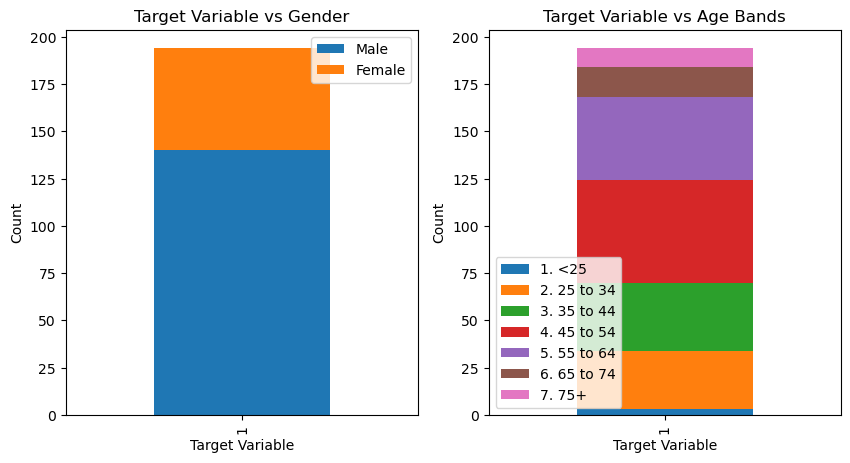

In [60]:
# Visualise only the values of 1 in the target column, against the 'Male' and 'Female' columns using a bar chart.
# Visualise only the values of 1 in the target column, against '1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+' columns using a bar chart.

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

cars_ALL[cars_ALL['Target'] == 1].groupby('Target')['Male', 'Female'].sum().plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Target Variable vs Gender')
ax[0].set_xlabel('Target Variable')
ax[0].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Target')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Target Variable vs Age Bands')
ax[1].set_xlabel('Target Variable')
ax[1].set_ylabel('Count')

plt.show()

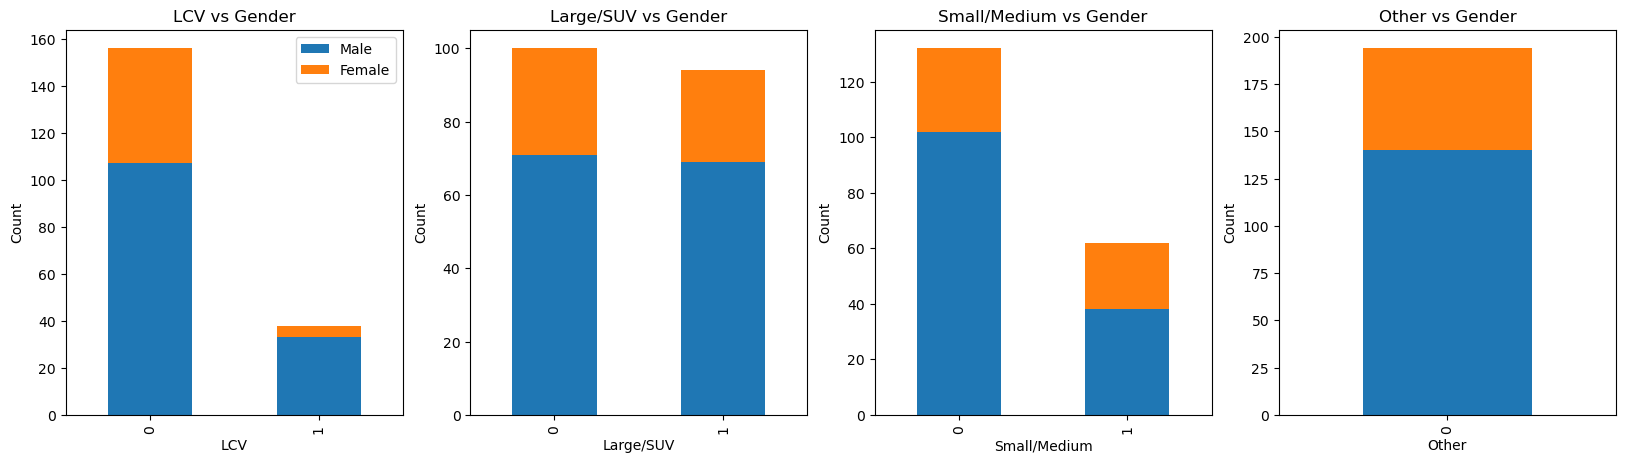

In [61]:
# Visualise the target variable with a value of 1, against LCV, Large/SUV, Small/Medium, and Other. Shown as percentages.

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

cars_ALL[cars_ALL['Target'] == 1].groupby('LCV')['Male', 'Female'].sum().plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('LCV vs Gender')
ax[0].set_xlabel('LCV')
ax[0].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Large/SUV')['Male', 'Female'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[1])
ax[1].set_title('Large/SUV vs Gender')
ax[1].set_xlabel('Large/SUV')
ax[1].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Small/Medium')['Male', 'Female'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[2])
ax[2].set_title('Small/Medium vs Gender')
ax[2].set_xlabel('Small/Medium')
ax[2].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Other')['Male', 'Female'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[3])
ax[3].set_title('Other vs Gender')
ax[3].set_xlabel('Other')
ax[3].set_ylabel('Count')

plt.show()

In [62]:
# Create a contingency table of the target variable and the Male column, with percentages.

pd.crosstab(cars_ALL['Target'], cars_ALL['Male'], normalize='index') * 100

Male,0,1
Target,,
0,44.305057,55.694943
1,27.835052,72.164948


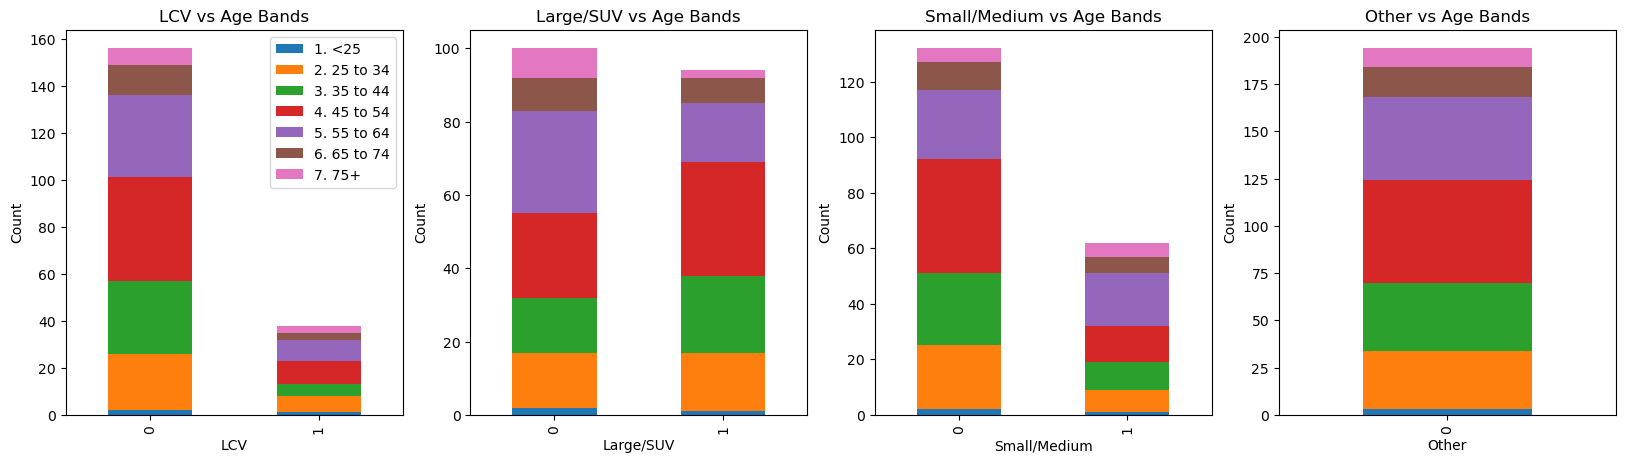

In [63]:
# Visualise the target variable with a value of 1, against LCV, Large/SUV, Small/Medium, and Other. Shown as percentages.

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

cars_ALL[cars_ALL['Target'] == 1].groupby('LCV')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('LCV vs Age Bands')
ax[0].set_xlabel('LCV')
ax[0].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Large/SUV')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[1])
ax[1].set_title('Large/SUV vs Age Bands')
ax[1].set_xlabel('Large/SUV')
ax[1].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Small/Medium')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[2])
ax[2].set_title('Small/Medium vs Age Bands')
ax[2].set_xlabel('Small/Medium')
ax[2].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Other')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[3])
ax[3].set_title('Other vs Age Bands')
ax[3].set_xlabel('Other')
ax[3].set_ylabel('Count')

plt.show()


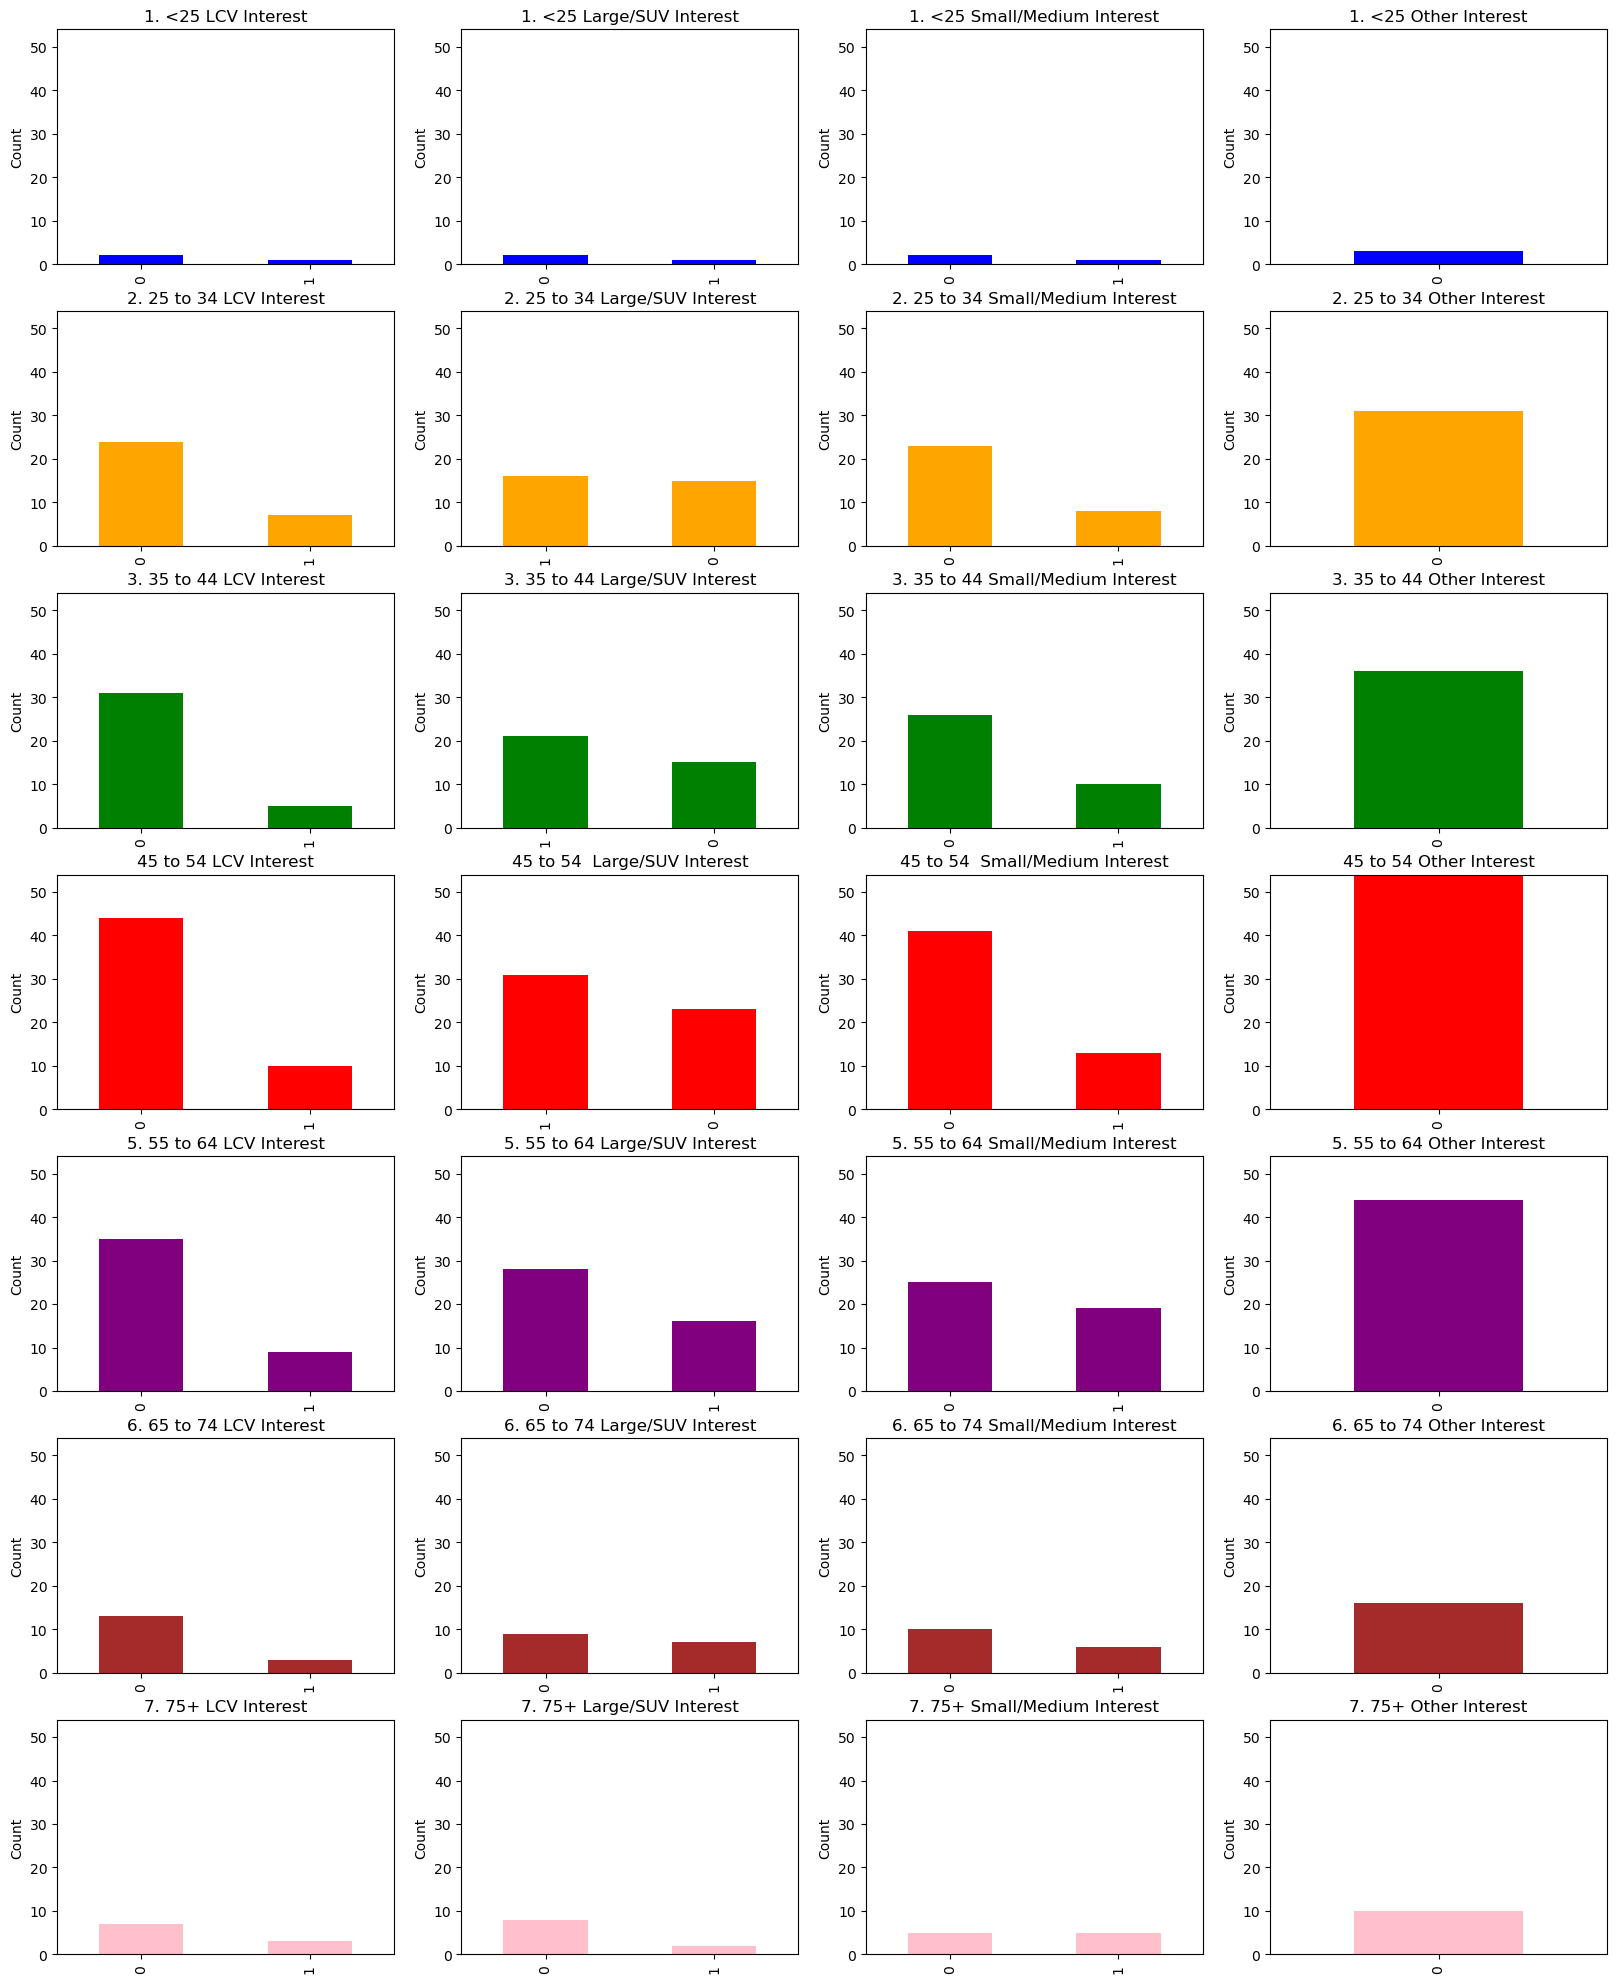

In [64]:
# For rows where Target = 1, and where corresponding age_bands = 1, display the frequency of 'LCV', 'Large/SUV', 'Small/Medium', 'Other' in a bar chart.

fig, ax = plt.subplots(7, 4, figsize=(20, 25))

max_y = cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['4. 45 to 54'] == 1)]['Other'].value_counts().max()
        
for i in range(7):
    for j in range(4):
        ax[i][j].set_ylim([0, max_y])
        ax[i][j].set_xticklabels(['No', 'Yes'], rotation=0)
        ax[i][j].set_ylabel('Count')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['1. <25'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[0][0], title='1. <25 LCV Interest', color='blue')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['1. <25'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[0][1], title='1. <25 Large/SUV Interest', color='blue')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['1. <25'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[0][2], title='1. <25 Small/Medium Interest', color='blue')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['1. <25'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[0][3], title='1. <25 Other Interest', color='blue')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['2. 25 to 34'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[1][0], title='2. 25 to 34 LCV Interest', color='orange')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['2. 25 to 34'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[1][1], title='2. 25 to 34 Large/SUV Interest', color='orange')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['2. 25 to 34'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[1][2], title='2. 25 to 34 Small/Medium Interest', color='orange')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['2. 25 to 34'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[1][3], title='2. 25 to 34 Other Interest', color='orange')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['3. 35 to 44'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[2][0], title='3. 35 to 44 LCV Interest', color='green')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['3. 35 to 44'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[2][1], title='3. 35 to 44 Large/SUV Interest', color='green')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['3. 35 to 44'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[2][2], title='3. 35 to 44 Small/Medium Interest', color='green')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['3. 35 to 44'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[2][3], title='3. 35 to 44 Other Interest', color='green')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['4. 45 to 54'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[3][0], title='45 to 54 LCV Interest', color='red')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['4. 45 to 54'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[3][1], title='45 to 54  Large/SUV Interest', color='red')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['4. 45 to 54'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[3][2], title='45 to 54  Small/Medium Interest', color='red')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['4. 45 to 54'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[3][3], title='45 to 54 Other Interest', color='red')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['5. 55 to 64'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[4][0], title='5. 55 to 64 LCV Interest', color='purple')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['5. 55 to 64'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[4][1], title='5. 55 to 64 Large/SUV Interest', color='purple')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['5. 55 to 64'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[4][2], title='5. 55 to 64 Small/Medium Interest', color='purple')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['5. 55 to 64'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[4][3], title='5. 55 to 64 Other Interest', color='purple')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['6. 65 to 74'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[5][0], title='6. 65 to 74 LCV Interest', color='brown')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['6. 65 to 74'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[5][1], title='6. 65 to 74 Large/SUV Interest', color='brown')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['6. 65 to 74'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[5][2], title='6. 65 to 74 Small/Medium Interest', color='brown')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['6. 65 to 74'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[5][3], title='6. 65 to 74 Other Interest', color='brown')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['7. 75+'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[6][0], title='7. 75+ LCV Interest', color='pink')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['7. 75+'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[6][1], title='7. 75+ Large/SUV Interest', color='pink')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['7. 75+'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[6][2], title='7. 75+ Small/Medium Interest', color='pink')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['7. 75+'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[6][3], title='7. 75+ Other Interest', color='pink')

plt.show()

> ##### Insights

- Men appear proportionately more likely to buy a second vehicle than females.

- The model most sought after by men is model [ 5 ] and [ 3 ] of [ Large/SUV ] vehicles.

- The highest age band of occurance is between 45 to 54, followed by 55 to 64.

- The most sought after car segment by 45 to 54 year olds is [ Large/SUV ] vehicles, while 55 to 64 year olds raise interest in [ Small/Medium ] vehicles. 

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Investigating the age of the vehicle, corresponding to an age brand.

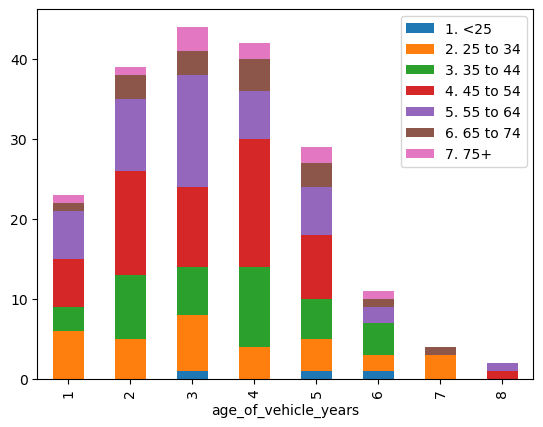

In [65]:
# Visualise how old the vehicles are before a specific age band decided to buy a new one.

cars_ALL[cars_ALL['Target'] == 1].groupby('age_of_vehicle_years')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True)
plt.show()

> ##### Insights

- While not conclusive , younger customers appear more likely to hold onto an existing vehicle, for longer.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Investigating the impact of servcing, age and total mileage on the cohort of interest.

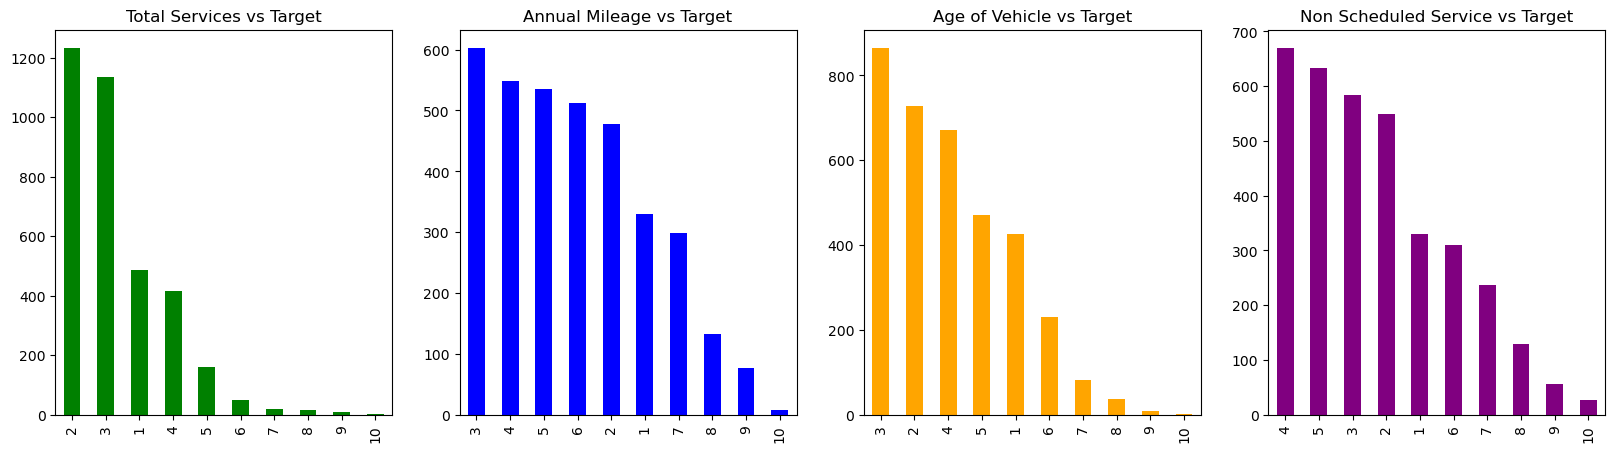

In [66]:
# Visualise total_services, annualised_mileage, age_of_vehicle and non_sched_serv_warr, against the target variable for casrs_NAG

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

cars_NAG[cars_NAG['Target'] == 1]['total_services'].value_counts().plot(kind='bar', title='Total Services vs Target', color='green', ax=ax[0])
cars_NAG[cars_NAG['Target'] == 1]['annualised_mileage'].value_counts().plot(kind='bar', title='Annual Mileage vs Target', color='blue', ax=ax[1])
cars_NAG[cars_NAG['Target'] == 1]['age_of_vehicle_years'].value_counts().plot(kind='bar', title='Age of Vehicle vs Target', color='orange', ax=ax[2])
cars_NAG[cars_NAG['Target'] == 1]['non_sched_serv_warr'].value_counts().plot(kind='bar', title='Non Scheduled Service vs Target', color='purple', ax=ax[3])

plt.show()

In [67]:
# Converting car_model back to a dummy variable for machine learning

cars_ALL = pd.get_dummies(cars_ALL, columns=['car_model'])
cars_NAG = pd.get_dummies(cars_NAG, columns=['car_model'])


> ##### Insights

- The least lower total services (deciles), the more likely a customer are to buy a new car from this dealership.

- While not conclusive, the more a customer has to non-routinely service their vehicle, after 4 services, the less likely they are to buy a new car from this dealership.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


 # Modelling


## Selecting a performance metric:

The selected metric for assessing the model is precision. 

This examines the proportion of true positives among all positive (predictions).

In this binary classification dillema, the positive predictions are customers who are more likely to purchase a new car.

Through optimising for precision, it reduces the liklihood of targeting the wrong customer.

<br>

An alternative metric, such as recall can be considered if precisons of models are similar.

Recall examines the proportion of true positives among all actual positive outcomes.

In this binary classification circumstance, a higher recall would mean more lost opportunities for the marketing campaign. 

<br>
<br>
<br>

### Create a function for a univariate logistic regression model.

Data will be split prior to model construction. 80% of the data will be used for training, and 20% for testing.

As the  dataset is imbalanced, stratification will be integrated into each function.


<br>
<br>
<br>

In [68]:
# Create a function for a univariate logistic regression model.

# Function: Precision and Recall from training and test sets.

def univariate_logistic_regression(dataset, feature, target, model):
    
    # Drop null values
    dataset = dataset.dropna(axis=0)

    # Create x and y variables
    X = dataset[feature].values.reshape(-1,1)
    y = dataset[target].values
    
    # Split the data into training and testing sets, with stratification based on y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict the test set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate the accuracy and recall score
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)

    return precision_train, recall_train, recall_test, precision_test 

# Function: Confusion matrix from training and test sets.

def univariate_logistic_regression_confusion_matrix(dataset, feature, target, model):
    
    # Drop null values
    dataset = dataset.dropna(axis=0)

    # Create x and y variables
    X = dataset[feature].values.reshape(-1,1)
    y = dataset[target].values
    
    # Split the data into training and testing sets, with stratification based on y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict the test set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate the confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    
    return cm_train, cm_test

### Baseline (Null accuracy)

Precision in this model is not adequately-defined, as it requires both true positives and false positives to be useful. As the majority of the data in the cohort of interest is negative (0 value), the null accuracy would equal the proportion of negative samples.

<br>
<br>
<br>

### Modelling the Cars_ALL dataframe: Logistic Regression

In [69]:
# Run the univariate_logistic_regression function against all features, and store the results in a dataframe.

# Create a dataframe to store the results
dataset = cars_ALL
results_ALL1 = pd.DataFrame(columns=['Feature', 'Precision_Train', 'Recall_Train', 'Recall_Test', 'Precision_Test'])

# Loop through each feature
for dataset in [cars_ALL]:
    for feature in ['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr', 'total_paid_services', 'total_services', 'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited', 'num_serv_dealer_purchased', 'annualised_mileage', 'car_model_1', 'car_model_2', 'car_model_3', 'car_model_4', 'car_model_5', 'car_model_6', 'car_model_7', 'car_model_8', 'car_model_9', 'car_model_10', 'car_model_11', 'car_model_12', 'car_model_13', 'car_model_14', 'car_model_15', 'car_model_16', 'car_model_17', 'car_model_18', '1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+', 'LCV', 'Large/SUV', 'Small/Medium', 'Other', 'Male', 'Female']:
        # Create a new LogisticRegression model
        model = LogisticRegression()
    
        # Call the univariate_logistic_regression function for the current feature
        precision_train, recall_train, recall_test, precision_test = univariate_logistic_regression(cars_ALL, feature, "Target", model)
    
        # Add the results to the results dataframe
        results_ALL1 = results_ALL1.append({'Feature': feature, 'Precision_Train': precision_train, 'Recall_Train': recall_train, 'Recall_Test': recall_test, 'Precision_Test': precision_test}, ignore_index=True)

In [70]:
# View the results for results_ALL.
results_ALL1

,Feature,Precision_Train,Recall_Train,Recall_Test,Precision_Test
0,age_of_vehicle_years,0.0,0.0,0.0,0.0
1,sched_serv_warr,0.0,0.0,0.0,0.0
2,non_sched_serv_warr,0.0,0.0,0.0,0.0
3,total_paid_services,0.0,0.0,0.0,0.0
4,total_services,0.0,0.0,0.0,0.0
5,mth_since_last_serv,0.0,0.0,0.0,0.0
6,annualised_mileage,0.0,0.0,0.0,0.0
7,num_dealers_visited,0.0,0.0,0.0,0.0
8,num_serv_dealer_purchased,0.0,0.0,0.0,0.0
9,annualised_mileage,0.0,0.0,0.0,0.0


In [71]:
# Run univariate_logistic_regression_confusion_matrix function against all features, and store the results in a dataframe.

# Create a dataframe to store the results
dataset = cars_ALL
results_ALL2 = pd.DataFrame(columns=['Feature', 'Precision_Train', 'Recall_Train', 'Recall_Test', 'Precision_Test'])

# Loop through each feature
for dataset in [cars_ALL]:
    for feature in ['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr', 'total_paid_services', 'total_services', 'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited', 'num_serv_dealer_purchased', 'annualised_mileage', '1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+', 'car_model_1', 'car_model_2', 'car_model_3', 'car_model_4', 'car_model_5', 'car_model_6', 'car_model_7', 'car_model_8', 'car_model_9', 'car_model_10', 'car_model_11', 'car_model_12', 'car_model_13', 'car_model_14', 'car_model_15', 'car_model_16', 'car_model_17', 'car_model_18', 'LCV', 'Large/SUV', 'Small/Medium', 'Other', 'Male', 'Female']:
        # Create a new LogisticRegression model
        model = LogisticRegression()

        # Call the univariate_logistic_regression_confusion_matrix function for the current feature
        cm_train, cm_test = univariate_logistic_regression_confusion_matrix(cars_ALL, feature, "Target", model)

        # Add the results to the results dataframe
        results_ALL2 = results_ALL2.append({'Feature': feature, 'Precision_Train': precision_train, 'Recall_Train': recall_train, 'Recall_Test': recall_test, 'Precision_Test': precision_test}, ignore_index=True)

In [72]:
# View the confusion matrix for the results_ALL training set.
cm_train

array([[14476,     0],
       [  155,     0]])

In [73]:
# View the confusion matrix for the results_ALL testing set.
cm_test

array([[3619,    0],
       [  39,    0]])

### Modelling the Cars_NAG dataframe: Logistic Regression

In [74]:
# Run the univariate_logistic_regression function against all features, and store the results in a dataframe.

# Create a dataframe to store the results
dataset = cars_NAG
results_NAG1 = pd.DataFrame(columns=['Feature', 'Precision_Train', 'Recall_Train', 'Recall_Test', 'Precision_Test'])

# Loop through each feature
for dataset in [cars_NAG]:
    for feature in ['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr', 'total_paid_services', 'total_services', 'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited', 'num_serv_dealer_purchased', 'annualised_mileage', 'car_model_1', 'car_model_2', 'car_model_3', 'car_model_4', 'car_model_5', 'car_model_6', 'car_model_7', 'car_model_8', 'car_model_9', 'car_model_10', 'car_model_11', 'car_model_12', 'car_model_13', 'car_model_14', 'car_model_15', 'car_model_16', 'car_model_17', 'car_model_18', 'LCV', 'Large/SUV', 'Small/Medium', 'Other']:
        # Create a new LogisticRegression model
        model = LogisticRegression()
    
        # Call the univariate_logistic_regression function for the current feature
        precision_train, recall_train, recall_test, precision_test = univariate_logistic_regression(cars_NAG, feature, "Target", model)
    
        # Add the results to the results dataframe
        results_NAG1 = results_NAG1.append({'Feature': feature, 'Precision_Train': precision_train, 'Recall_Train': recall_train, 'Recall_Test': recall_test, 'Precision_Test': precision_test}, ignore_index=True)

In [75]:
# View the results for results_NAG.
results_NAG1

,Feature,Precision_Train,Recall_Train,Recall_Test,Precision_Test
0,age_of_vehicle_years,0.0,0.0,0.0,0.0
1,sched_serv_warr,0.0,0.0,0.0,0.0
2,non_sched_serv_warr,0.0,0.0,0.0,0.0
3,total_paid_services,0.0,0.0,0.0,0.0
4,total_services,0.0,0.0,0.0,0.0
5,mth_since_last_serv,0.0,0.0,0.0,0.0
6,annualised_mileage,0.0,0.0,0.0,0.0
7,num_dealers_visited,0.0,0.0,0.0,0.0
8,num_serv_dealer_purchased,0.0,0.0,0.0,0.0
9,annualised_mileage,0.0,0.0,0.0,0.0


In [86]:
# Run univariate_logistic_regression_confusion_matrix function against all features, and store the results in a dataframe.

# Create a dataframe to store the results
dataset = cars_NAG
results_NAG2 = pd.DataFrame(columns=['Feature', 'Precision_Train', 'Recall_Train', 'Recall_Test', 'Precision_Test'])

# Loop through each feature
for dataset in [cars_NAG]:
    for feature in ['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr', 'total_paid_services', 'total_services', 'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited', 'num_serv_dealer_purchased', 'annualised_mileage', 'car_model_1', 'car_model_2', 'car_model_3', 'car_model_4', 'car_model_5', 'car_model_6', 'car_model_7', 'car_model_8', 'car_model_9', 'car_model_10', 'car_model_11', 'car_model_12', 'car_model_13', 'car_model_14', 'car_model_15', 'car_model_16', 'car_model_17', 'car_model_18', 'LCV', 'Large/SUV', 'Small/Medium', 'Other']:
        # Create a new LogisticRegression model
        model = LogisticRegression()

        # Call the univariate_logistic_regression_confusion_matrix function for the current feature
        cm_train, cm_test = univariate_logistic_regression_confusion_matrix(cars_NAG, feature, "Target", model)

        # Add the results to the results dataframe
        results_NAG2 = results_NAG2.append({'Feature': feature, 'Precision_Train': precision_train, 'Recall_Train': recall_train, 'Recall_Test': recall_test, 'Precision_Test': precision_test}, ignore_index=True)

In [77]:
# View the confusion matrix for the results_ALL traininging set.
cm_train

array([[100071,      0],
       [  2817,      0]])

In [78]:
# View the confusion matrix for the results_ALL testing set.
cm_test

array([[25019,     0],
       [  704,     0]])

### Modelling the Cars_ALL dataframe with KNeighbours Classifier

In [79]:
# Create an empty dataframe for Kneighborsclassifier results

knc_results1 = pd.DataFrame(index=cars_ALL.columns, columns=['Precision_Train', 'Recall_Train', 'Recall_Test', 'Precision_Test'])

# Loop through each column

for column in cars_ALL.columns[:]:
    knc_results1.loc[column] = univariate_logistic_regression(cars_ALL, column, "Target", KNeighborsClassifier())

# View the results for simple_knc_results.
knc_results1

,Precision_Train,Recall_Train,Recall_Test,Precision_Test
Target,1.0,1.0,1.0,1.0
age_of_vehicle_years,0.0,0.0,0.0,0.0
sched_serv_warr,0.0,0.0,0.0,0.0
non_sched_serv_warr,0.0,0.0,0.0,0.0
sched_serv_paid,0.0,0.0,0.0,0.0
non_sched_serv_paid,0.0,0.0,0.0,0.0
total_paid_services,0.0,0.0,0.0,0.0
total_services,0.0,0.0,0.0,0.0
mth_since_last_serv,0.0,0.0,0.0,0.0
annualised_mileage,0.0,0.0,0.0,0.0


In [92]:
# Run univariate_logistic_regression_confusion_matrix function against all features, and store the results in a dataframe.

# Create a dataframe to store the results
dataset = knc_results1
knc_results1 = pd.DataFrame(columns=['Feature', 'Precision_Train', 'Recall_Train', 'Recall_Test', 'Precision_Test'])

# Loop through each feature
for dataset in [knc_results1]:
    for feature in ['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr', 'total_paid_services', 'total_services', 'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited', 'num_serv_dealer_purchased', 'annualised_mileage', '1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+', 'car_model_1', 'car_model_2', 'car_model_3', 'car_model_4', 'car_model_5', 'car_model_6', 'car_model_7', 'car_model_8', 'car_model_9', 'car_model_10', 'car_model_11', 'car_model_12', 'car_model_13', 'car_model_14', 'car_model_15', 'car_model_16', 'car_model_17', 'car_model_18', 'LCV', 'Large/SUV', 'Small/Medium', 'Other', 'Male', 'Female']:
        # Create a new LogisticRegression model
        model = KNeighborsClassifier()

        # Call the univariate_logistic_regression_confusion_matrix function for the current feature
        cm_train, cm_test = univariate_logistic_regression_confusion_matrix(cars_ALL, feature, "Target", model)

        # Add the results to the results dataframe
        knc_results1 = knc_results1.append({'Feature': feature, 'Precision_Train': precision_train, 'Recall_Train': recall_train, 'Recall_Test': recall_test, 'Precision_Test': precision_test}, ignore_index=True)

In [93]:
# View the confusion matrix for the results_NAG traininging set.
cm_train

array([[14476,     0],
       [  155,     0]])

In [94]:
# View the confusion matrix for the results_NAG testing set.
cm_test

array([[3619,    0],
       [  39,    0]])

### Modelling the Cars_NAG dataframe with KNeighbours Classifier

In [80]:
# Create an empty dataframe for Kneighborsclassifier results

knc_results2 = pd.DataFrame(index=cars_NAG.columns, columns=['Precision_Train', 'Recall_Train', 'Recall_Test', 'Precision_Test'])

# Loop through each column

for column in cars_NAG.columns[:]:
    knc_results2.loc[column] = univariate_logistic_regression(cars_NAG, column, "Target", KNeighborsClassifier())

# View the results for simple_knc_results.
knc_results2

,Precision_Train,Recall_Train,Recall_Test,Precision_Test
Target,1.0,1.0,1.0,1.0
age_of_vehicle_years,0.0,0.0,0.0,0.0
sched_serv_warr,0.0,0.0,0.0,0.0
non_sched_serv_warr,0.0,0.0,0.0,0.0
sched_serv_paid,0.0,0.0,0.0,0.0
non_sched_serv_paid,0.0,0.0,0.0,0.0
total_paid_services,0.0,0.0,0.0,0.0
total_services,0.0,0.0,0.0,0.0
mth_since_last_serv,0.0,0.0,0.0,0.0
annualised_mileage,0.0,0.0,0.0,0.0


In [95]:
# Run univariate_logistic_regression_confusion_matrix function against all features, and store the results in a dataframe.

# Create a dataframe to store the results
dataset = knc_results2
knc_results2 = pd.DataFrame(columns=['Feature', 'Precision_Train', 'Recall_Train', 'Recall_Test', 'Precision_Test'])

# Loop through each feature
for dataset in [cars_NAG]:
    for feature in ['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr', 'total_paid_services', 'total_services', 'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited', 'num_serv_dealer_purchased', 'annualised_mileage', 'car_model_1', 'car_model_2', 'car_model_3', 'car_model_4', 'car_model_5', 'car_model_6', 'car_model_7', 'car_model_8', 'car_model_9', 'car_model_10', 'car_model_11', 'car_model_12', 'car_model_13', 'car_model_14', 'car_model_15', 'car_model_16', 'car_model_17', 'car_model_18', 'LCV', 'Large/SUV', 'Small/Medium', 'Other']:
        # Create a new LogisticRegression model
        model = KNeighborsClassifier()

        # Call the univariate_logistic_regression_confusion_matrix function for the current feature
        cm_train, cm_test = univariate_logistic_regression_confusion_matrix(cars_NAG, feature, "Target", model)

        # Add the results to the results dataframe
        knc_results2 = results_NAG2.append({'Feature': feature, 'Precision_Train': precision_train, 'Recall_Train': recall_train, 'Recall_Test': recall_test, 'Precision_Test': precision_test}, ignore_index=True)

In [96]:
# View the confusion matrix for the results_ALL traininging set.
cm_train

array([[100071,      0],
       [  2817,      0]])

In [97]:
# View the confusion matrix for the results_ALL testing set.
cm_test

array([[25019,     0],
       [  704,     0]])

<br>
<br>

> ##### Insights

Based on the provided confusion matrix, it both logistic regression and k-nearest neighbors (knc) models for both datasets did not predict any positive values, as all predicted values were 0. This means that the models did not find any meaningful relationship between the predictors and the outcome, and they failed to correctly classify any positive cases.

The confusion matrix for the [ cars_ALL ] logistic regression model shows that there were [ 100,071 ] true negatives and [ 2,817 ] false negatives, but no true positives or false positives. This indicates that the models did not have any predictive power and could not distinguish between positive and negative cases.

Therefore, the results are not statistically significant and suggest that the models need further improvement or a different approach to achieve better performance.

<br>
<br>

<hr>
<br>

**End of notebook 1.**